![](../additional_materials/logos/darden_rice_logo_SM.png)

### VBM Demographic Analysis
#### 2021 Municipal Primary, St. Petersburg, Ballots Returned
---

In [1]:
import pandas as pd
from pandas.tseries.offsets import BDay
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import datetime

---
---
### Instructions
1. When you receive the daily VBM file, save it in the following location and format: `../data/raw/vbm_mm-dd-yy.txt`. The date *must* be formatted correctly for the analysis to work.
2. Run this notebook! The output of the daily demographics and ballots returned csvs will be in the folder `../data/daily_vbm/`. The output of the daily visualizations PDF will be in the `../visualizations/` folder.
3. If you're running this report on a date other than when you received the raw file from the campaign, be sure to update the variables in the first cell so the correct dates are referenced. By default, this code assumes the day you run the report is the same as the date the reort was received.
---

In [2]:
today = datetime.date.today().strftime('%m-%d-%y')
# In the following line 'BDay(1)' signifies 1 business day, and is subtracted from the current date
preceding_rpt_date = (datetime.date.today() - BDay(1)).strftime('%m-%d-%y')

# This is the raw file you received from the campaign today
read_file = f'../data/raw/vbm_{today}.txt'

preceding_rpt_file = f'../data/daily_vbm/{preceding_rpt_date}_VBM_ballots_returned.csv'

# Demographics breakdown df will save to this location
demographics_write_file = f'../data/daily_vbm/{today}_VBM_demographics.csv'

# Daily ballots df will save to this location
daily_ballots_write_file = f'../data/daily_vbm/{today}_VBM_ballots_returned.csv'

# Daily ballots visualizations will save to this location
viz_file = f'../visualizations/{today}_VBM_demographics_viz.pdf'

In [3]:
print(read_file)
print(preceding_rpt_file)
print(demographics_write_file)
print(daily_ballots_write_file)
print(viz_file)

../data/raw/vbm_08-23-21.txt
../data/daily_vbm/08-20-21_VBM_ballots_returned.csv
../data/daily_vbm/08-23-21_VBM_demographics.csv
../data/daily_vbm/08-23-21_VBM_ballots_returned.csv
../visualizations/08-23-21_VBM_demographics_viz.pdf


---
---

### Section 1: Demographic Breakdowns

In [4]:
df = pd.read_csv(read_file)

In [5]:
df.head(3)

,VoterID,Voter_Name,Last_Name,First_Name,Middle_Name,Name_Style,Formatted_Address,City_State,Zip_Country,Residence_Address,Street_Number,Street_Number_Suffix,Street_Dir,Street_Name,Street_Type,Street_Dir_Suffix,Unit_Type,Apartment_Number,Zip_Code,City_Name,Mailing_Address_1,Mailing_Address_2,Mailing_Address_3,Mailing_Address_4,Mailing_City,Mailing_State,Mailing_zip,Mailing_Country,Race,Sex,Birth_Date,Registration_Date,Congressional_District,Party,Precinct,House_District,Senate_District,Commission_District,School_Board_District,Assistance_Required,Mailing_Address_Flag,City_Code,City_Ward,Telephone_Number,Voter_Status,Sample_Ballots_By_Email,Vote_by_Mail_Email_Address,Public_Email_Address
0,124700503,"AALL, CHRISTIAN B",AALL,CHRISTIAN,BERGENGREN,NaN,265 22ND AVE SE,ST PETERSBURG FL,33705,265 22ND AVE SE,265,NaN,NaN,22ND,AVE,SE,NaN,NaN,33705,ST PETERSBURG,265 22ND AVE SE,ST PETERSBURG FL 33705,NaN,NaN,ST PETERSBURG,FL,33705,NaN,5,M,12/07/1955,04/03/2017,13,DEM,118.0,70,19,7,7,N,N,21,216,(727)329-6381,ACT,Y,NaN,CHRIS@AALLONLINE.COM
1,106917229,"ABERDEEN, CLEM F",ABERDEEN,CLEM,FITZROY,NaN,1545 39TH ST S,ST PETERSBURG FL,33711,1545 39TH ST S,1545,NaN,NaN,39TH,ST,S,NaN,NaN,33711,ST PETERSBURG,1545 39TH ST S,ST PETERSBURG FL 33711,NaN,NaN,ST PETERSBURG,FL,33711,NaN,3,M,11/05/1947,11/03/1989,13,DEM,204.0,70,19,7,7,N,N,21,217,NaN,ACT,NaN,NaN,NaN
2,121025105,"ABLUM, THOMAS S",ABLUM,THOMAS,S,NaN,330 3RD ST S #1019,ST PETERSBURG FL,33701,330 3RD ST S #1019,330,NaN,NaN,3RD,ST,S,NaN,#1019,33701,ST PETERSBURG,330 3RD ST S #1019,ST PETERSBURG FL 33701,NaN,NaN,ST PETERSBURG,FL,33701,NaN,5,M,07/12/1954,07/19/2013,13,REP,123.0,68,19,7,7,N,N,21,216,(312)296-6996,ACT,NaN,NaN,NaN


In [6]:
df.shape

(2882, 48)

In [7]:
# Extract and assign age based on birth date
def age(bday):
    bday = datetime.datetime.strptime(bday, '%m/%d/%Y').date()
    today = datetime.date.today()
    return today.year - bday.year - ((today.month, today.day) < (bday.month, bday.day))

# Create column to hold ages
df['Age'] = df['Birth_Date'].apply(age)

In [8]:
# Relabel race based on data dictionary (see '../data/VBM_Report_Codes.txt')
eth_dict = {1: 'Native American/Alaskan', 2: 'Asian or Pacific Isl', 3: 'African American', 
            4: 'Hispanic', 5: 'White', 6: 'Other', 7: 'Multi-Racial', 9: 'Unknown'}

df['Race'] = df['Race'].map(eth_dict)

In [9]:
# Dataframe columns to keep for analysis
keep_columns = ['Precinct', 'Sex', 'Race', 'Party', 'Age']

# Set dataframe to contain only the features in 'keep_columns'
df = df[keep_columns].copy()

# Cast the precincts as integers
df['Precinct'] = df['Precinct'].astype(int)

# Rename columns to match mailed ballot analysis
df = df.rename({'Sex': 'Gender', 'Race': 'Ethnicity'}, axis=1)

In [10]:
# Sort in order of precinct
df = df.sort_values('Precinct', axis=0)
df.reset_index(drop=True, inplace=True)

In [11]:
df.head(3)

,Precinct,Gender,Ethnicity,Party,Age
0,101,M,White,NPA,49
1,101,M,White,DEM,64
2,101,F,African American,DEM,64


In [12]:
df.tail(3)

,Precinct,Gender,Ethnicity,Party,Age
2879,275,F,White,NPA,35
2880,275,F,African American,NPA,55
2881,275,F,White,REP,75


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882 entries, 0 to 2881
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Precinct   2882 non-null   int64 
 1   Gender     2882 non-null   object
 2   Ethnicity  2882 non-null   object
 3   Party      2882 non-null   object
 4   Age        2882 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 112.7+ KB


In [14]:
print(df['Gender'].unique())
print(df['Ethnicity'].unique())
print(df['Party'].unique())

['M' 'F' 'U']
['White' 'African American' 'Other' 'Hispanic' 'Unknown'
 'Native American/Alaskan' 'Asian or Pacific Isl' 'Multi-Racial']
['NPA' 'DEM' 'REP' 'IND' 'GRE' 'LPF']


In [15]:
df['Gender'].value_counts()

F    1585
M    1231
U      66
Name: Gender, dtype: int64

---
---
**BELOW:** This is the count of total ballots returned **only** for the current reporting date. It is **not** a running total of ballots returned.

In [16]:
total_daily_ballots = len(df)
total_daily_ballots

2882

In [17]:
# Save formatted df
df.to_csv(demographics_write_file, index=False)

---
---

### Demographic Visualizations

In [18]:
fig_title = f'Daily Demographic Breakdown {today}\nTotal VBM Ballots Returned Today: {total_daily_ballots}'

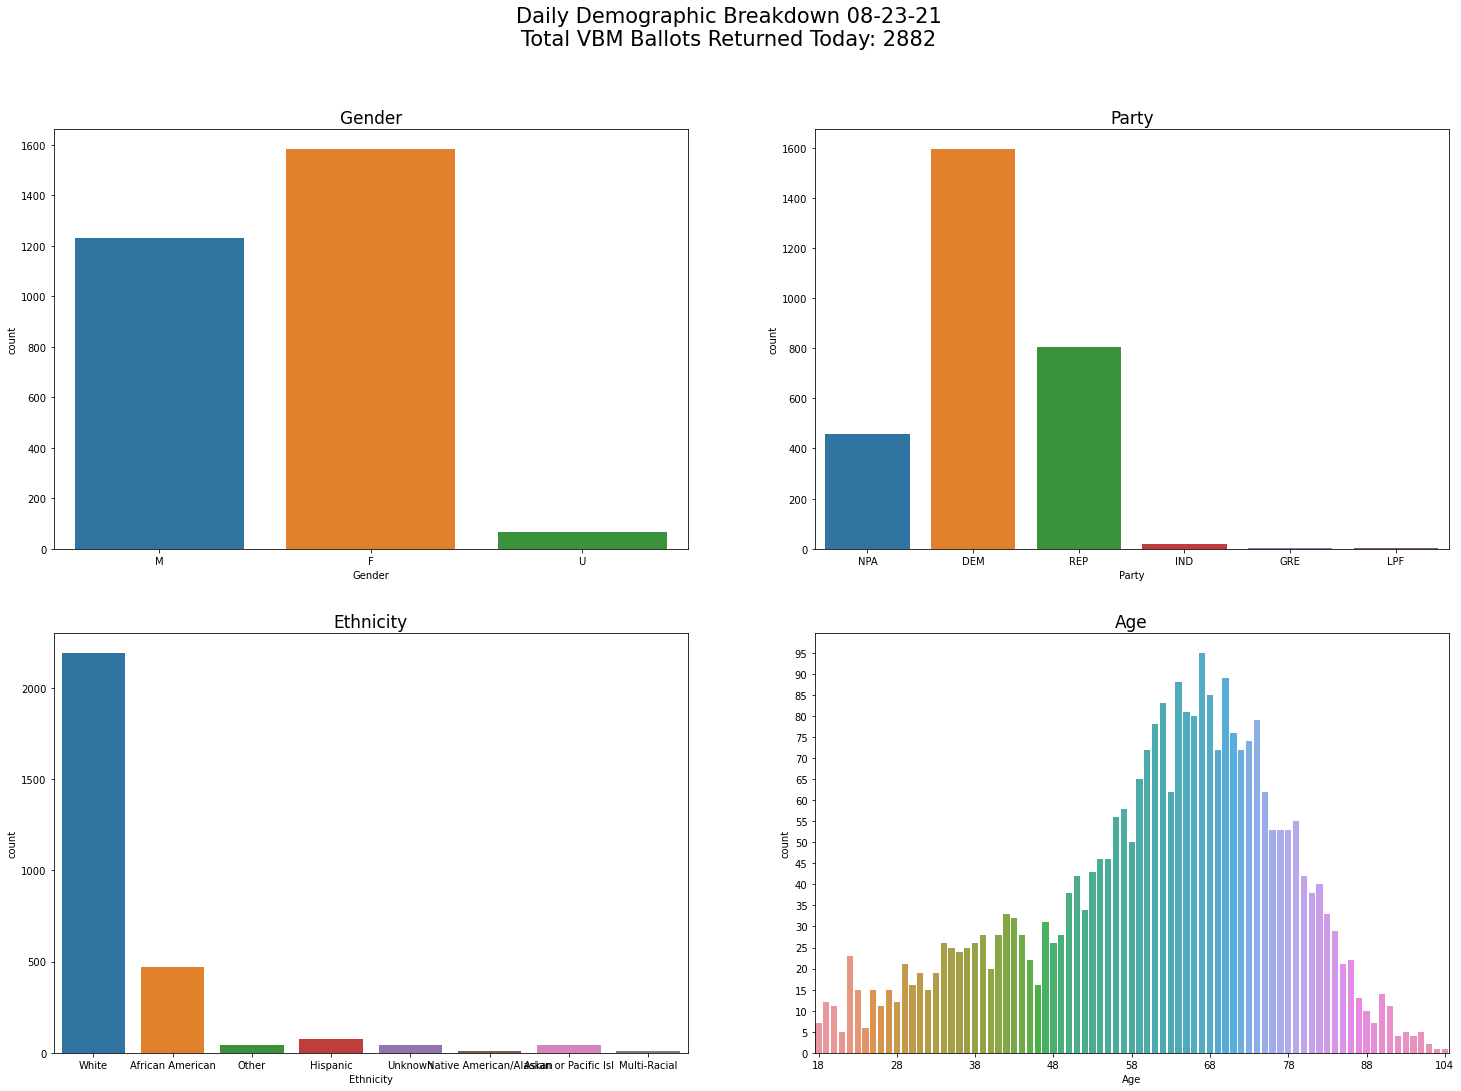

In [19]:
# Plot daily demographic breakdown by gender, ethnicity, party affiliation, and age
fig, axes = plt.subplots(2, 2, figsize=(25, 17))
fig.suptitle(fig_title, size=21)

# Gender subplot
genplot = sns.countplot(ax=axes[0, 0], data=df, x='Gender')
genplot.set_title('Gender', size=17)

# Ethnicity subplot
ethplot = sns.countplot(ax=axes[1, 0], data=df, x='Ethnicity')
ethplot.set_title('Ethnicity', size=17)

# Party subplot
partyplot = sns.countplot(ax=axes[0, 1], data=df, x='Party')
partyplot.set_title('Party', size=17)

# Age subplot
ageplot = sns.countplot(ax=axes[1, 1], data=df, x='Age')
ageplot.xaxis.set_major_locator(ticker.MultipleLocator(10)) 
x = df['Age'].value_counts()
plt.yticks(np.arange(0, max(x)+1, 5)) 
ageplot.set_title('Age', size=17)


# Save the plot
plt.savefig(viz_file, dpi=300)

plt.show()

---
---

### Section 2: Daily VBM Ballot Counts

In [20]:
# Create df of ballots received by precinct
precinct_df = df['Precinct'].value_counts().rename_axis('Precinct').reset_index(name='VBM Ballots Returned Today')
precinct_df = precinct_df.sort_values('Precinct', axis=0)
precinct_df.reset_index(drop=True, inplace=True)

In [21]:
precinct_df.head(3)

,Precinct,VBM Ballots Returned Today
0,101,66
1,102,32
2,103,9


In [22]:
# Read in total requested ballots by precinct for comparison
requested_df = pd.read_csv('../data/processed/2021_VBM_mailed_ballots_master.csv')

requested_df = requested_df[['Precinct', 'Total People']]

In [23]:
precinct_df = requested_df.merge(precinct_df, how='left', left_on='Precinct', right_on='Precinct')

# Fill nulls in 'VBM Ballots Returned Today' with a value of 0
precinct_df['VBM Ballots Returned Today'].fillna(0, inplace=True)

# Cast as integers
precinct_df['VBM Ballots Returned Today'] = precinct_df['VBM Ballots Returned Today'].astype(int)

In [24]:
precinct_df

,Precinct,Total People,VBM Ballots Returned Today
0,101,2006,66
1,102,965,32
2,103,485,9
3,104,956,34
4,105,1994,51
...,...,...,...
86,237,110,5
87,239,1687,47
88,240,909,17
89,241,1106,26


---
---

### Section 3: Daily Vs. Master Comparison

In [25]:
# Load the preceding report - will be used to generate running totals
comp_df = pd.read_csv(preceding_rpt_file)

# Drop 'Totals' row from the last report
comp_df = comp_df.drop(91)

In [26]:
# Replace yesterday's 'VBM Ballots Returned Today' entries with today's
comp_df['VBM Ballots Returned Today'] = precinct_df['VBM Ballots Returned Today']

In [27]:
comp_df.head(3)

,Precinct,VBM Ballots Returned Today,Total Returned Ballots,Total Requested Ballots,Percent of Total
0,101,66,632,2006,0.3151
1,102,32,357,965,0.3699
2,103,9,208,485,0.4289


In [28]:
comp_df.isnull().sum()

Precinct                      0
VBM Ballots Returned Today    0
Total Returned Ballots        0
Total Requested Ballots       0
Percent of Total              0
dtype: int64

---

In [29]:
# Update total returned ballots by adding count from latest report
comp_df['Total Returned Ballots'] = comp_df['Total Returned Ballots'] + precinct_df['VBM Ballots Returned Today']

In [30]:
# Calculate and input percent of total returned
comp_df['Percent of Total'] = round(comp_df['Total Returned Ballots'] / comp_df['Total Requested Ballots'], 4)

In [31]:
# Generate row for totals
comp_df.loc[len(comp_df.index)] = ['TOTALS', sum(comp_df['VBM Ballots Returned Today']), sum(comp_df['Total Returned Ballots']),
                                   sum(comp_df['Total Requested Ballots']), 0]

comp_df.iloc[91, 4] = round((comp_df['Total Returned Ballots'][91]) / (comp_df['Total Requested Ballots'][91]), 4)

In [32]:
comp_df

,Precinct,VBM Ballots Returned Today,Total Returned Ballots,Total Requested Ballots,Percent of Total
0,101,66,698,2006,0.3480
1,102,32,389,965,0.4031
2,103,9,217,485,0.4474
3,104,34,360,956,0.3766
4,105,51,745,1994,0.3736
...,...,...,...,...,...
87,239,47,562,1687,0.3331
88,240,17,286,909,0.3146
89,241,26,439,1106,0.3969
90,275,4,150,469,0.3198


In [33]:
# Save to clean csv
comp_df.to_csv(daily_ballots_write_file, index=False)

---
---